In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
os.getcwd()

'/storage/work/n/nxt5197/577_exoplanets/project'

In [2]:
data_folder = '/storage/home/nxt5197/work/577_exoplanets/project/lightcurves/'
data = data_folder + 'kepler/AVG_SAP.dat'
df = pd.read_csv(data,delimiter='\t',header=None)
df=df.rename(columns={0: 'MJD', 1: 'Normalized_Flux',2: 'Error'})

In [3]:
x = df.MJD
y = df.Normalized_Flux
err = df.Error

# plt.figure(figsize=(15,8))
# plt.errorbar(x,y,yerr=err,fmt='o')
# plt.xlim(min(x),max(x[x<55473]))
# plt.show()

# plt.figure(figsize=(15,8))
# plt.errorbar(x,y,yerr=err,fmt='o')
# plt.xlim(min(x[x>56000]),max(x[x<56200]))
# plt.show()

# plt.figure(figsize=(15,8))
# plt.errorbar(x,y,yerr=err,fmt='o')
# plt.xlim(min(x[x>56200]),max(x))
# plt.show()

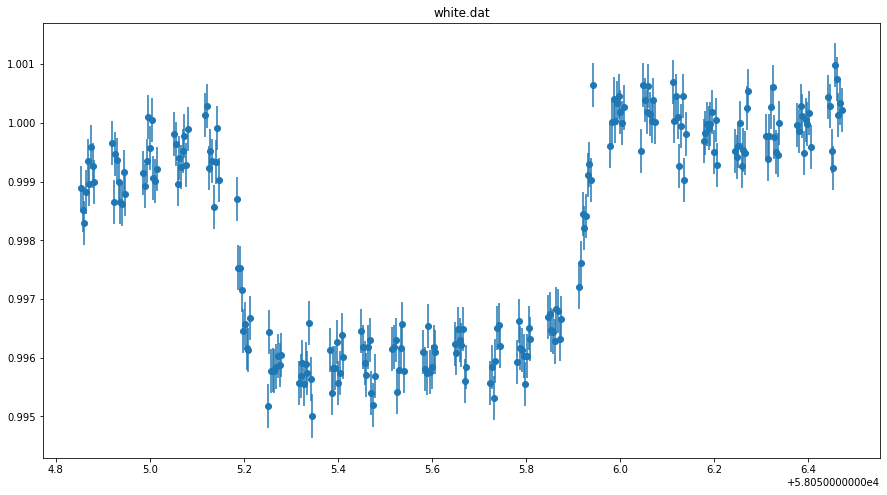

In [4]:
# data_folder = '/storage/home/nxt5197/work/577_exoplanets/project/lightcurves/wfc3_kepler1625/'
# dats = sorted(glob.glob(data_folder+'*.dat'))
# for data in dats:
#     df = pd.read_csv(data,delimiter='\t',header=None)
#     df=df.rename(columns={0: 'MJD', 1: 'Normalized_Flux',2: 'Error'})
#     x = df.MJD
#     y = df.Normalized_Flux
#     err = df.Error

#     plt.figure(figsize=(15,8))
#     plt.errorbar(x,y,yerr=err,fmt='o')
#     # plt.xlim(min(x),max(x[x<55473]))
#     plt.title(f'{data.split("/")[-1]}')
#     plt.show()

data = '/storage/home/nxt5197/work/577_exoplanets/project/lightcurves/wfc3_kepler1625/white.dat'
df = pd.read_csv(data,delimiter='\t',header=None)
df=df.rename(columns={0: 'MJD', 1: 'Normalized_Flux',2: 'Error'})
x = df.MJD
y = df.Normalized_Flux
err = df.Error

plt.figure(figsize=(15,8))
plt.errorbar(x,y,yerr=err,fmt='o')
# plt.xlim(min(x),max(x[x<55473]))
plt.title(f'{data.split("/")[-1]}')
plt.show()

## Analytic Light Curves for Planetary Transit Searches - Mandel & Agol 2002
$F = 1 - \frac{I^*(z)}{4 \Omega} \bigg[ p^2 \cos^{-1} \Big( \frac{z-1}{p} \Big) - (z-1) \sqrt{p^2 - (z-1)^2} \bigg]$ <br>
$I^*(z) = (1-a)^{-1} \int^1_{z-p} I(r) 2r dr$ <br>
$p = r_p/r_*$ <br>
$z = d/r_*$ <br>
d = center to center distance <br>
$a = (z-p)^2$ <br>
$\Omega = \sum_{n=0}^4 c_n (n+4)^{-1}$ <br>
$c_1 = c_3 = 0$ <br>
$c_2 = \gamma_1 + 2 \gamma_2$ <br>
$c_4 = -\gamma_2$ <br>
$I(r) = 1 - \gamma_1(1-\mu)-\gamma_2(1-\mu)^2$ <br>
$\gamma_1 + \gamma_2 < 1$ <br>
$\mu = \cos \theta = (1-r^2)^{1/2}$ <br>
For linear limb darkening, $\gamma_2 = 0$ <br>

In [5]:
# import sys
# sys.path.insert(1, '/storage/home/nxt5197/work/577_exoplanets/project/MoonPy/')
# from moonpy import *

In [6]:
# usr_dict = {'period': 287.3727,
#             'tau0': 2456043.9572, 
#             'impact': 0.099, 
#             'duration_hours': 18.684, 
#             'rprstar': 0.06061, 
#             'sma_AU': 0.98, 
#             'rp_rearth': 11.4,
#             'savepath': '/storage/home/nxt5197/work/577_exoplanets/project/data/'}
# lc_object = MoonpyLC(targetID="Kepler-1625b")#,lc_times=x,lc_fluxes=y,lc_errors=err,usr_dict=usr_dict,lc_quarters=[],remove_flagged='n')

In [7]:
# k1625 = MoonpyLC(targetID='Kepler-1625b', clobber='y')

In [8]:
import lightkurve as lk

In [30]:
search_result = lk.search_lightcurve("Kepler-1625", author="Kepler", cadence="long")
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 04,2010,Kepler,1800,kplr004760478,0.0
1,Kepler Quarter 05,2010,Kepler,1800,kplr004760478,0.0
2,Kepler Quarter 07,2010,Kepler,1800,kplr004760478,0.0
3,Kepler Quarter 08,2011,Kepler,1800,kplr004760478,0.0
4,Kepler Quarter 09,2011,Kepler,1800,kplr004760478,0.0
5,Kepler Quarter 11,2012,Kepler,1800,kplr004760478,0.0
6,Kepler Quarter 12,2012,Kepler,1800,kplr004760478,0.0
7,Kepler Quarter 13,2012,Kepler,1800,kplr004760478,0.0
8,Kepler Quarter 15,2013,Kepler,1800,kplr004760478,0.0


In [31]:
lc_collection = search_result.download_all()
lc_collection

LightCurveCollection of 11 objects:
    0: <KeplerLightCurve LABEL="KIC 4760478" QUARTER=4 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    1: <KeplerLightCurve LABEL="KIC 4760478" QUARTER=5 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    2: <KeplerLightCurve LABEL="KIC 4760478" QUARTER=7 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    3: <KeplerLightCurve LABEL="KIC 4760478" QUARTER=8 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    4: <KeplerLightCurve LABEL="KIC 4760478" QUARTER=9 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    5: <KeplerLightCurve LABEL="KIC 4760478" QUARTER=11 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    6: <KeplerLightCurve LABEL="KIC 4760478" QUARTER=12 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    7: <KeplerLightCurve LABEL="KIC 4760478" QUARTER=13 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    8: <KeplerLightCurve LABEL="KIC 4760478" QUARTER=15 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    9: <KeplerLightCurve LABEL="KIC 4760478" QUARTER=16 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    10: <KeplerLigh

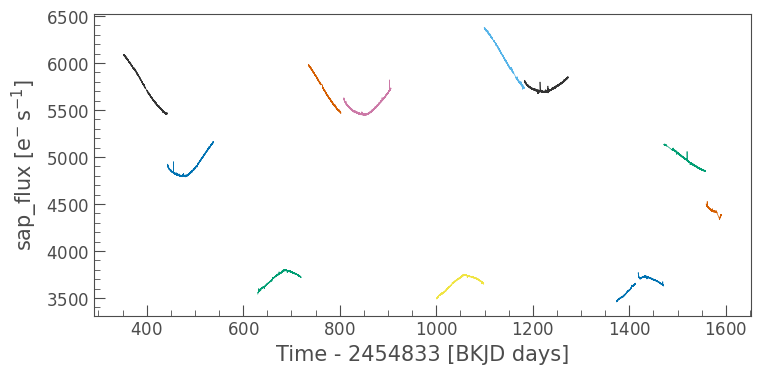

In [32]:
ax = lc_collection[0].plot(column='sap_flux', label=None)
for lc in lc_collection[1:]:
    lc.plot(ax=ax, column='sap_flux', label=None)

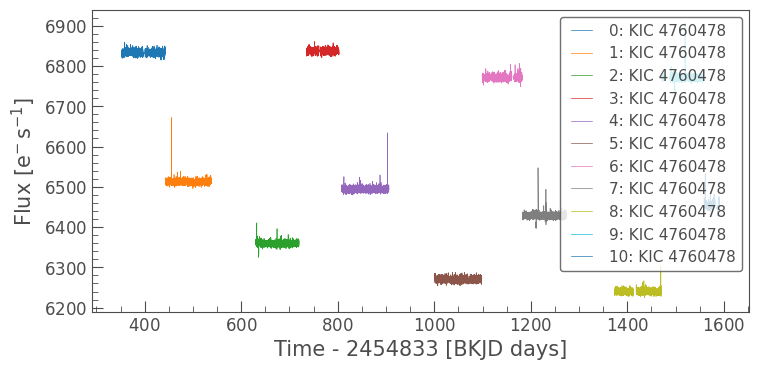

In [34]:
lc_collection.plot();

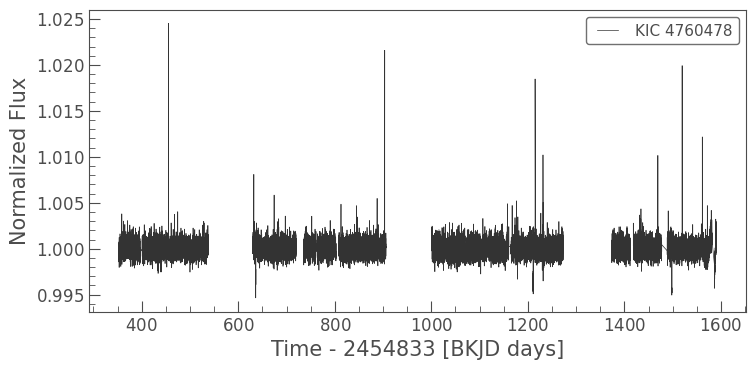

In [36]:
lc_stitched = lc_collection.stitch()
lc_stitched.plot();

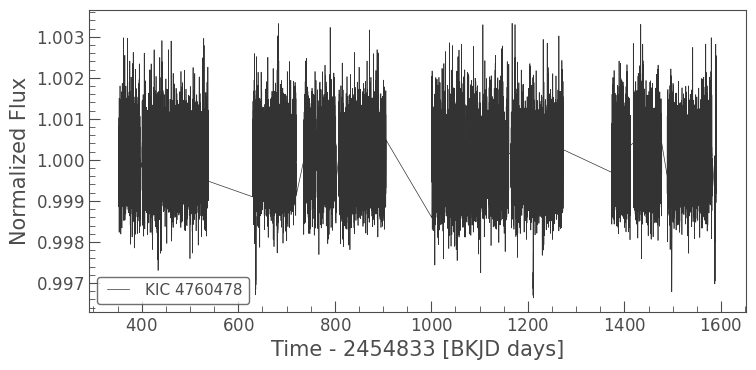

In [38]:
# Flatten the light curve
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot();

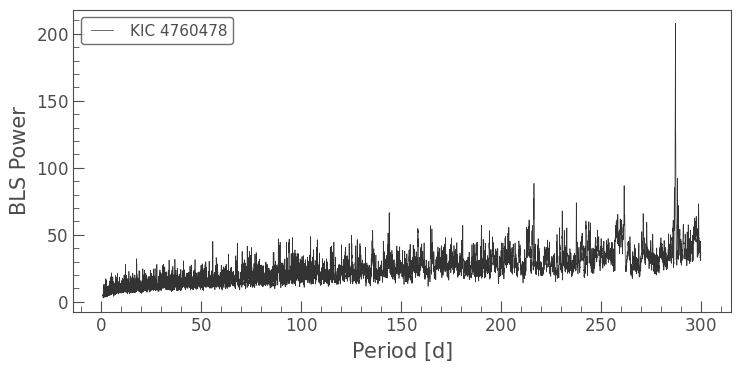

In [40]:
import numpy as np
# Create array of periods to search
period = np.linspace(1, 300, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();

In [41]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period
planet_b_period

<Quantity 287.38093809 d>

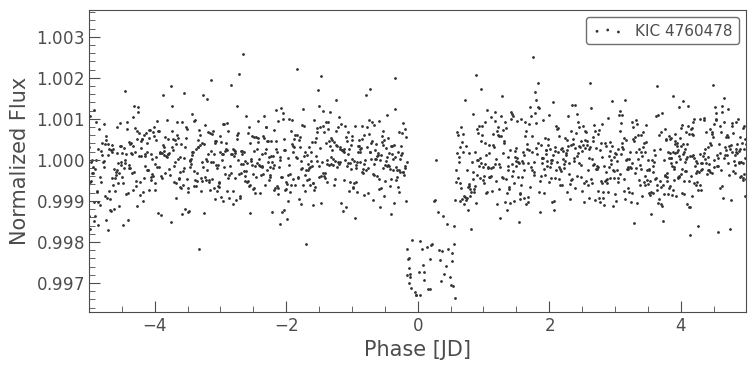

In [42]:
ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-5, 5);

In [43]:
# Create a cadence mask using the BLS parameters
planet_b_mask = bls.get_transit_mask(period=planet_b_period,
                                     transit_time=planet_b_t0,
                                     duration=planet_b_dur)

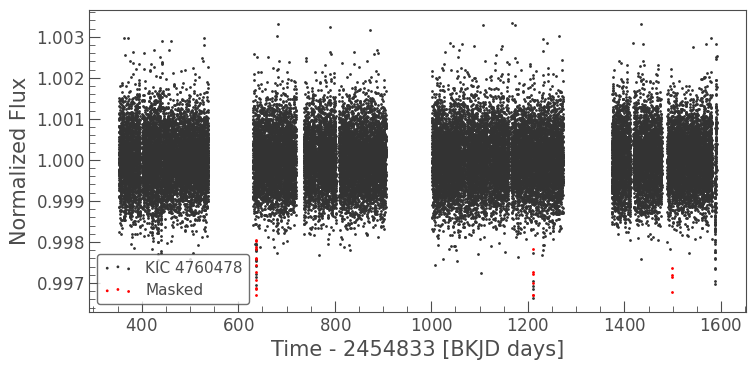

In [44]:
masked_lc = lc[~planet_b_mask]
ax = masked_lc.scatter();
lc[planet_b_mask].scatter(ax=ax, c='r', label='Masked');

In [45]:
# Create a BLS model using the BLS parameters
planet_b_model = bls.get_transit_model(period=planet_b_period,
                                       transit_time=planet_b_t0,
                                       duration=planet_b_dur)

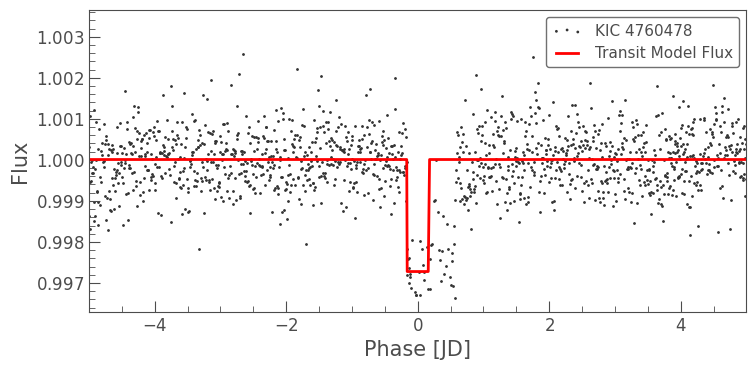

In [46]:
ax = lc.fold(planet_b_period, planet_b_t0).scatter()
planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-5, 5);

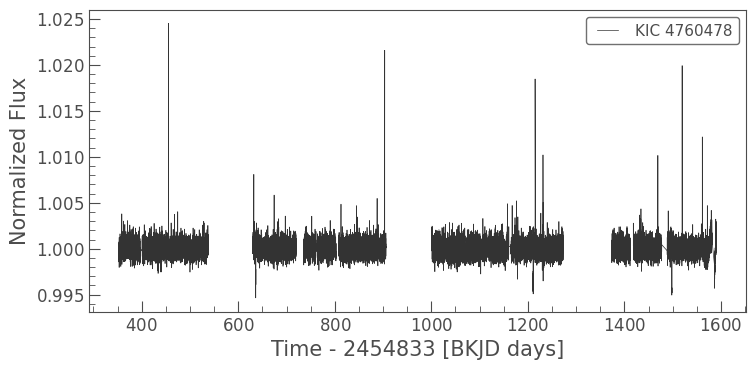

In [47]:
lc = lk.search_lightcurve('Kepler-1625', author='Kepler', cadence='long').download_all().stitch()
lc.plot();

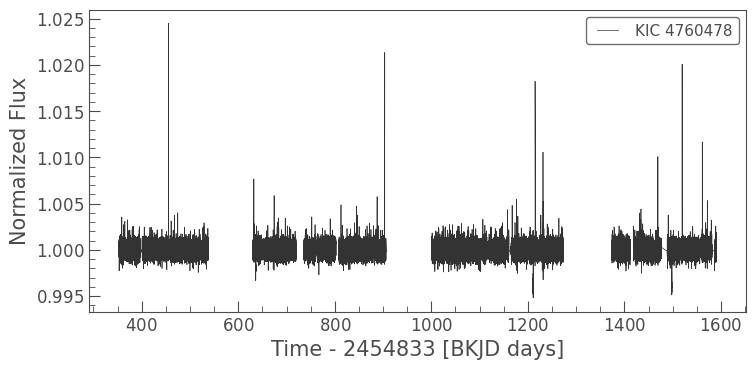

In [48]:
clc = lc.flatten(21)
clc.plot();

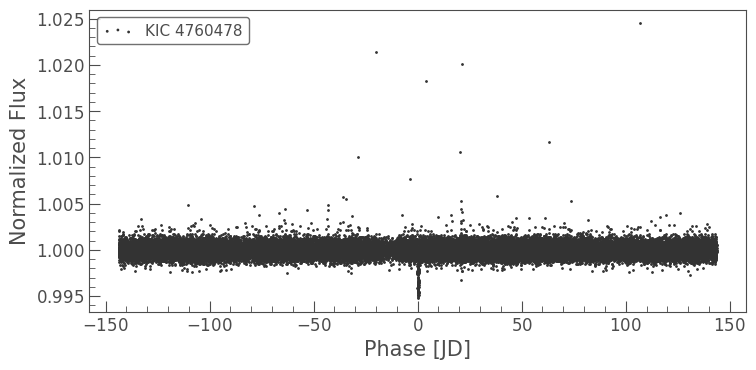

In [49]:
# Period (p) and and reference transit time (t0) are taken from the NASA Exoplanet Archive
p, t0 = planet_b_period, planet_b_t0
folded_lc = clc.fold(period=p, epoch_time=t0)
folded_lc.scatter();

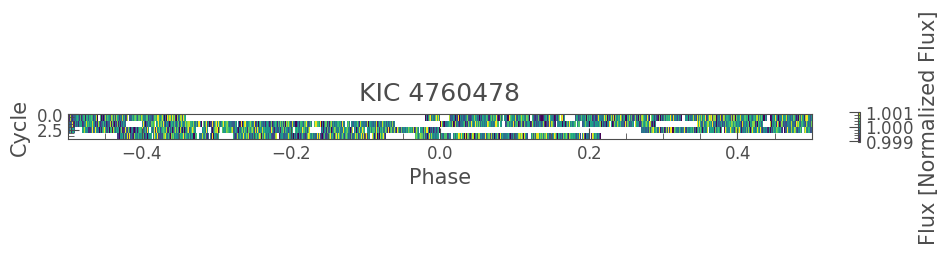

In [50]:
folded_lc.plot_river();

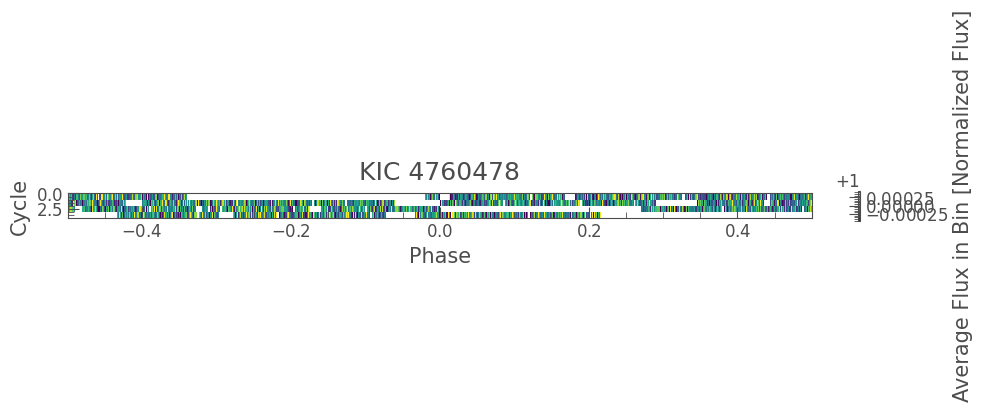

In [51]:
folded_lc.plot_river(bin_points=5, method='median');

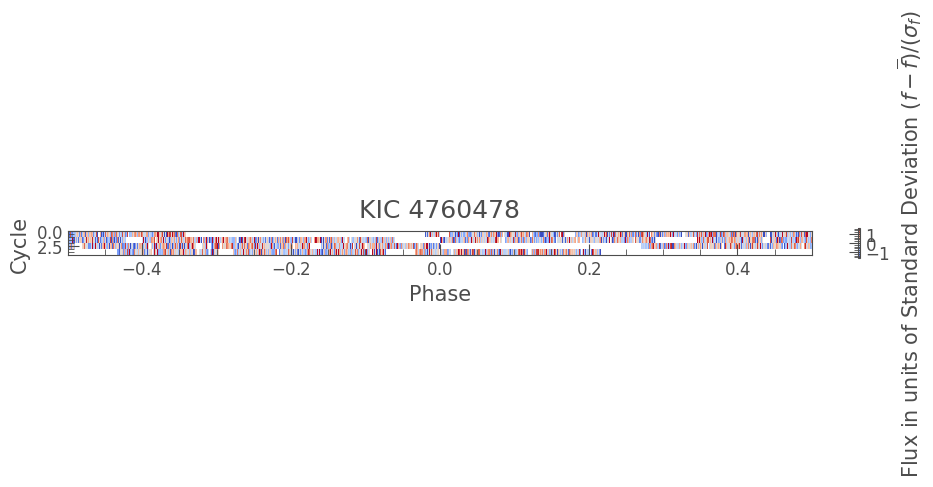

In [52]:
folded_lc.plot_river(bin_points=1, method='sigma');

In [19]:
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile("Kepler-1625", quarter=16).download()

<AxesSubplot:title={'center':'Target ID: 4760478, Cadence: 70977'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

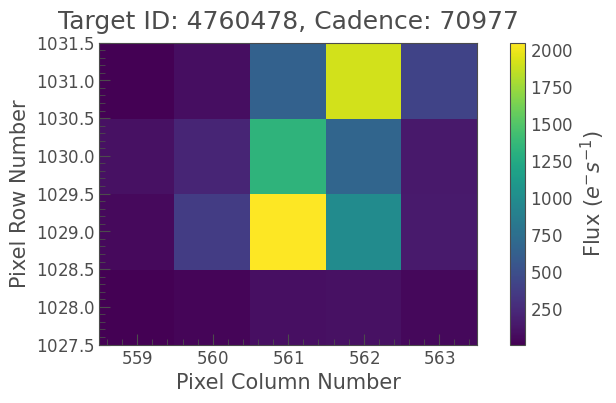

In [20]:
pixelfile.plot(frame=1)

In [21]:
lc = pixelfile.to_lightcurve(aperture_mask='all')
lc.time

<Time object: scale='tdb' format='bkjd' value=[1559.2255583  1559.2459925  1559.26642679 ... 1590.96025659 1590.98069105
 1591.00112572]>

In [22]:
lc.flux

<Quantity [9509.426, 9512.333, 9507.375, ..., 9441.286, 9415.088, 9425.56 ] electron / s>

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

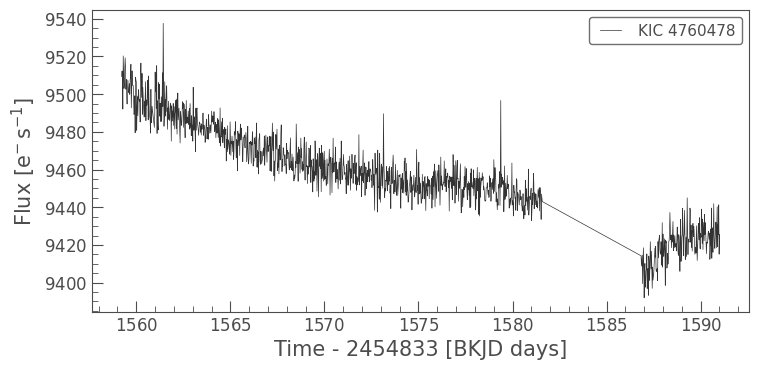

In [23]:
lc.plot()

In [3]:
lc_dir='/storage/home/nxt5197/work/577_exoplanets/project/MoonPy/Central_Data/Kepler_lightcurves/KIC004760478/'
import glob
from astropy.io import fits
fits_files = sorted(glob.glob(lc_dir+'*.fits'))
f = fits_files[0]
for f in fits_files:
    hdu_list = fits.open(f)
    hdu_list.info()

    hdu_list[0].header['OBJECT']

Filename: /storage/home/nxt5197/work/577_exoplanets/project/MoonPy/Central_Data/Kepler_lightcurves/KIC004760478/kplr004760478-2010078095331_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    161   4397R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (6, 5)   int32   
Filename: /storage/home/nxt5197/work/577_exoplanets/project/MoonPy/Central_Data/Kepler_lightcurves/KIC004760478/kplr004760478-2010174085026_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    161   4634R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (5, 4)   int32   
Filename: /storage/home/nxt5197/work/577_exoplanets/project/MoonPy/Central_Data/Kepler_lightcurves/KIC004760478/kplr